In [1]:
#Imports
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.manifold import TSNE

from mpl_toolkits.mplot3d import Axes3D

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Carregando dados
df_dados = pd.read_csv('train.csv',delimiter=',')

#df_dados = df_dados.sample(frac=1)

df_dados

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607


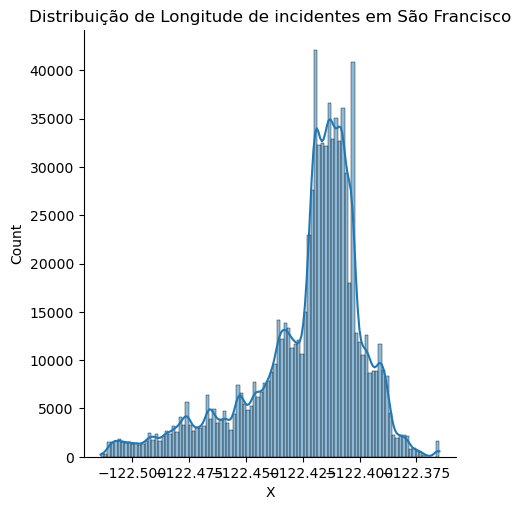

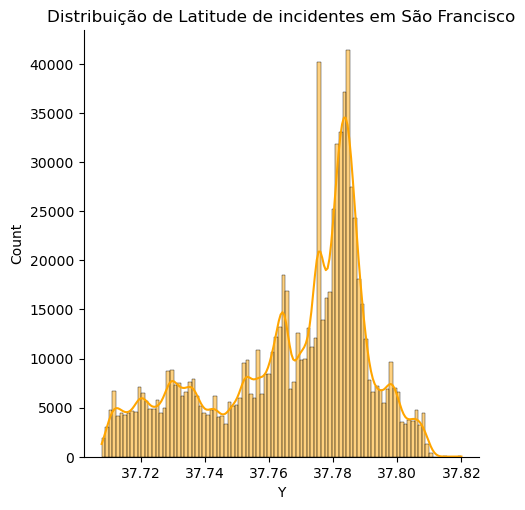

In [3]:
#plt.scatter(df_dados['X'], df_dados['Y'])
dadosLimpos = df_dados[df_dados['X'] <= -120.8]
plot1 = sns.displot(dadosLimpos['X'], kde=True, bins=100).set(title='Distribuição de Longitude de incidentes em São Francisco')
plot2 = sns.displot(dadosLimpos['Y'], kde=True, bins=100, color = 'orange').set(title='Distribuição de Latitude de incidentes em São Francisco')


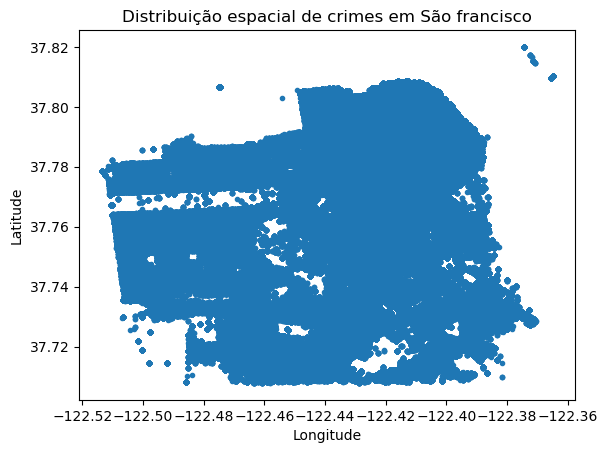

In [4]:
plt.scatter(dadosLimpos['X'], dadosLimpos['Y'].array,marker='.')

plt.title('Distribuição espacial de crimes em São francisco')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()




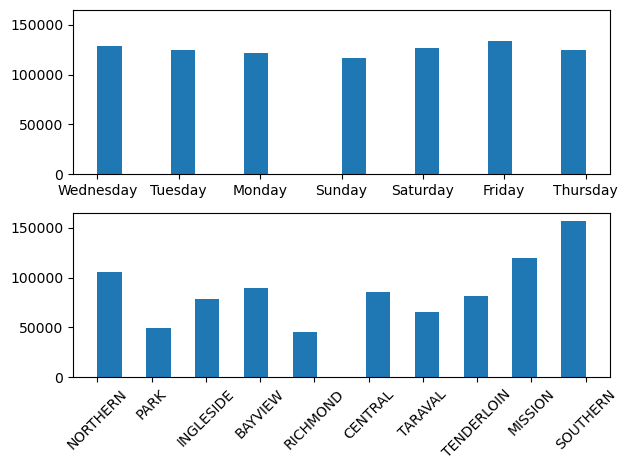

In [5]:
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
fig, axs = plt.subplots(2, 1, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(dadosLimpos['DayOfWeek'], bins=20)
axs[1].hist(dadosLimpos['PdDistrict'], bins=20)
plt.xticks(rotation = 45)
plt.show()

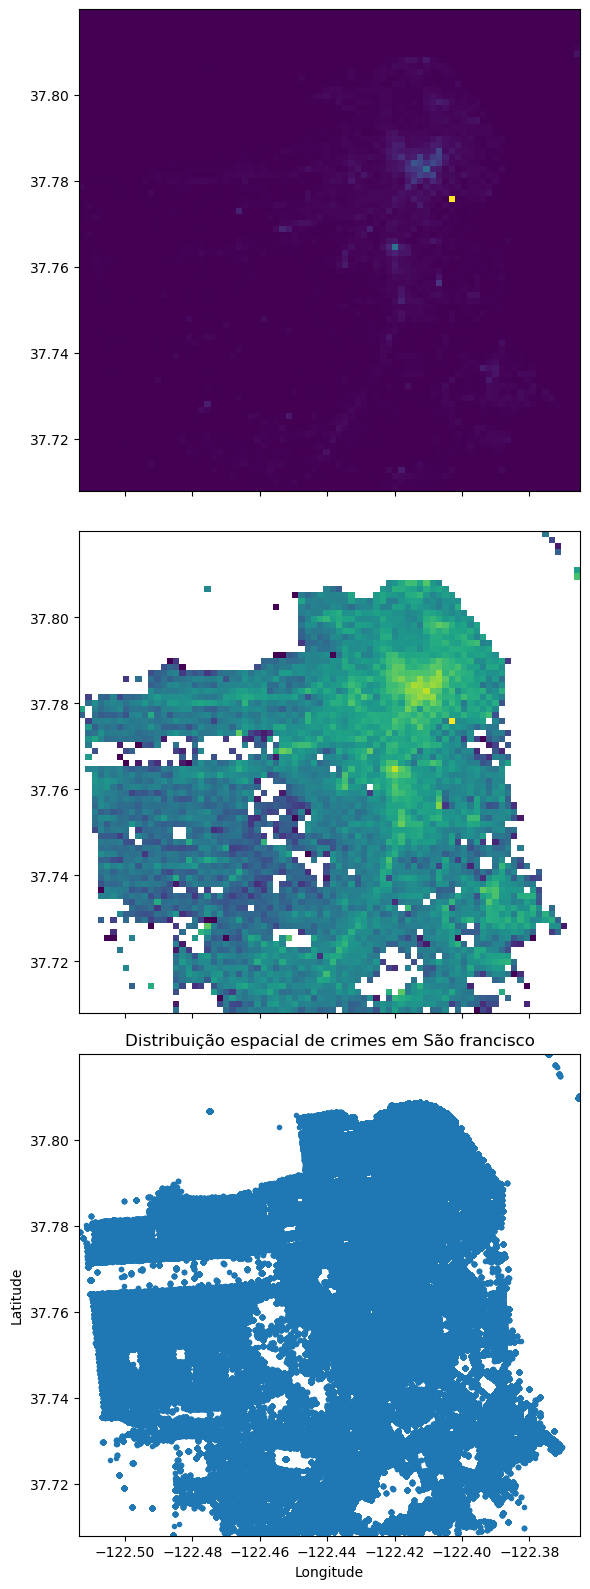

In [6]:
fig, axs = plt.subplots(3, 1, figsize=(6, 16), sharex=True, sharey=True,
                        tight_layout=True)

# We can increase the number of bins on each axis
axs[0].hist2d(dadosLimpos['X'], dadosLimpos['Y'], bins = 80)

# As well as define normalization of the colors
axs[1].hist2d(dadosLimpos['X'], dadosLimpos['Y'], bins = 80, norm=colors.LogNorm())

axs[2].scatter(dadosLimpos['X'], dadosLimpos['Y'].array,marker='.')

plt.title('Distribuição espacial de crimes em São francisco')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

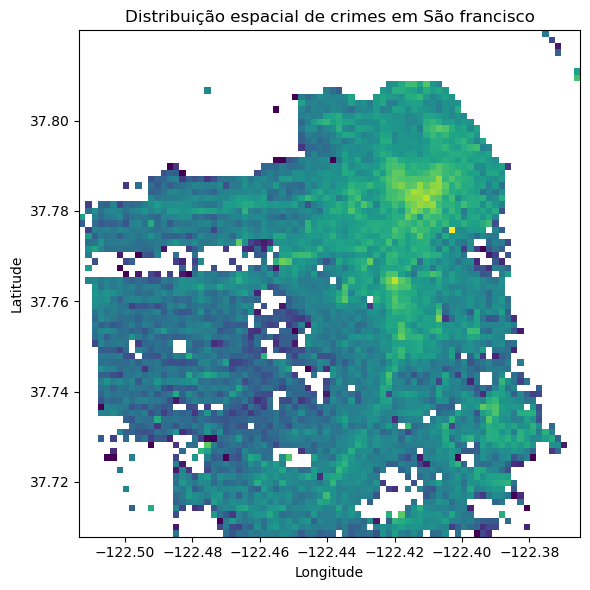

In [7]:
fig, axs = plt.subplots(1, 1, figsize=(6, 6), sharex=True, sharey=True,
                        tight_layout=True)
axs.hist2d(dadosLimpos['X'], dadosLimpos['Y'], bins = 80, norm=colors.LogNorm())

plt.title('Distribuição espacial de crimes em São francisco')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

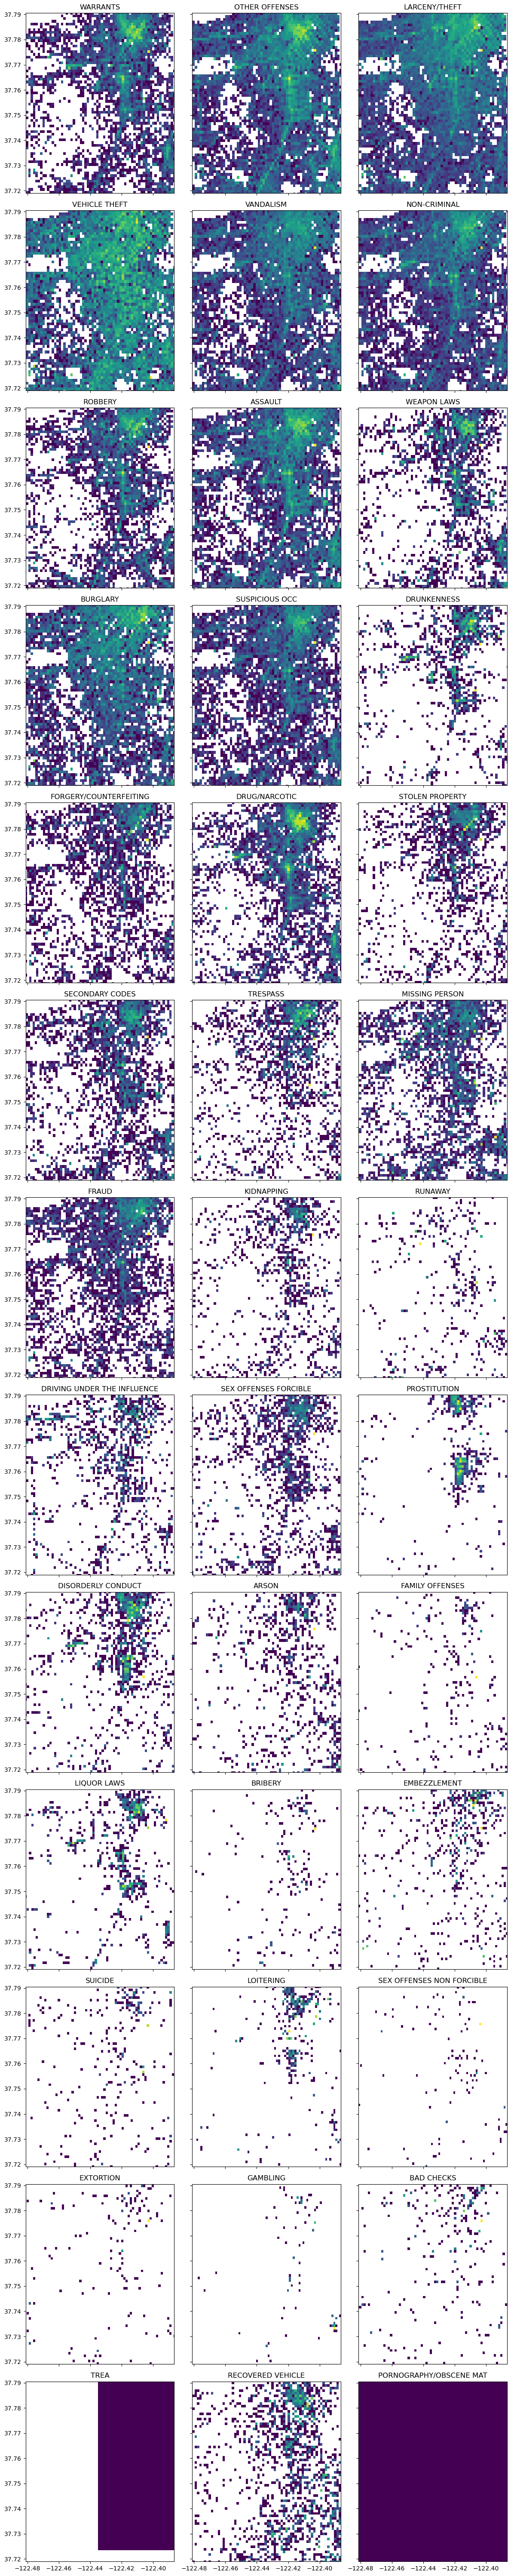

In [8]:
categories = dadosLimpos['Category'].unique()

fig, axs = plt.subplots(13, 3, figsize=(12, 60), sharex=True, sharey=True,
                        tight_layout=True)
counter = 0
for itemCategory in categories:
    df2=  dadosLimpos.loc[dadosLimpos['Category'] == itemCategory]
    
    axs[int(counter/3)][counter % 3].hist2d(df2['X'], df2['Y'], bins = 100, norm=colors.LogNorm())
    axs[int(counter/3)][counter % 3].title.set_text(itemCategory)
    counter = counter + 1
    
    
#plt.title('Distribuição espacial de crimes em São francisco')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
plt.show()

In [9]:
df2['Dates'] = pd.to_datetime(df_dados['Dates'])

df2['Year'] = df2['Dates'].dt.year
df2['Month'] = df2['Dates'].dt.month
df2['DayOfMonth'] = df2['Dates'].dt.day
df2['Hours'] = df2['Dates'].dt.hour
df2['Minutes'] = df2['Dates'].dt.minute

df2.head()

C:\Users\marce\AppData\Local\Temp\ipykernel_12352\844869088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Dates'] = pd.to_datetime(df_dados['Dates'])
C:\Users\marce\AppData\Local\Temp\ipykernel_12352\844869088.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Year'] = df2['Dates'].dt.year
C:\Users\marce\AppData\Local\Temp\ipykernel_12352\844869088.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,DayOfMonth,Hours,Minutes
148475,2013-05-28 18:44:00,PORNOGRAPHY/OBSCENE MAT,POSSESSION OF OBSCENE MATTER FOR SALE,Tuesday,SOUTHERN,UNFOUNDED,1400 Block of FOLSOM ST,-122.413171,37.772616,2013,5,28,18,44
205045,2012-08-23 16:35:00,PORNOGRAPHY/OBSCENE MAT,POSSESSION OF OBSCENE MATTER FOR SALE,Thursday,SOUTHERN,"ARREST, BOOKED",MARKET ST / 5TH ST,-122.408068,37.783992,2012,8,23,16,35
252093,2011-12-18 03:00:00,PORNOGRAPHY/OBSCENE MAT,POSSESSION OF OBSCENE MATTER FOR SALE,Sunday,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,2011,12,18,3,0
279791,2011-07-25 08:00:00,PORNOGRAPHY/OBSCENE MAT,POSSESSION OF OBSCENE MATTER FOR SALE,Monday,TENDERLOIN,"ARREST, CITED",200 Block of HYDE ST,-122.415722,37.783068,2011,7,25,8,0
317526,2010-12-28 17:56:00,PORNOGRAPHY/OBSCENE MAT,POSSESSION OF OBSCENE MATTER FOR SALE,Tuesday,BAYVIEW,"ARREST, BOOKED",1300 Block of THOMAS AV,-122.386594,37.727818,2010,12,28,17,56


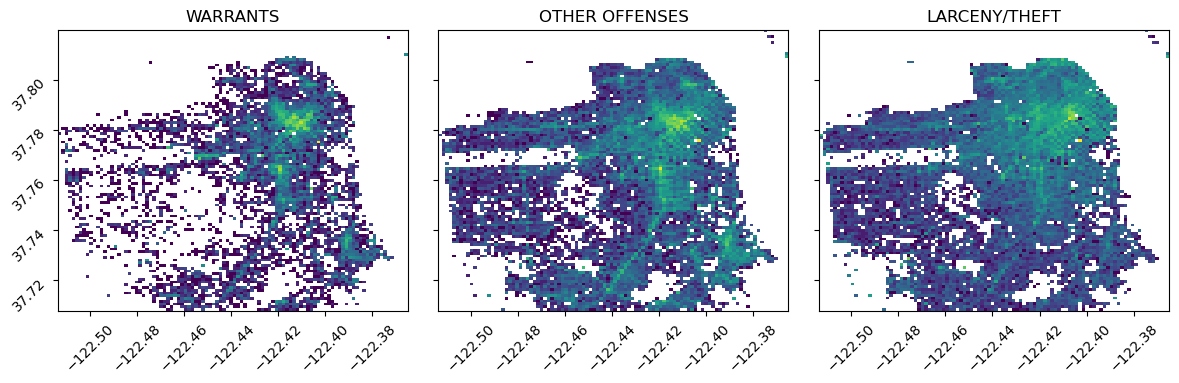

In [17]:
categories = dadosLimpos['Category'].unique()

fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True,
                        tight_layout=True)
counter = 0
for itemCategory in categories:
    df2=  dadosLimpos.loc[dadosLimpos['Category'] == itemCategory]
    
    axs[counter % 3].hist2d(df2['X'], df2['Y'], bins = 100, norm=colors.LogNorm())
    axs[counter % 3].title.set_text(itemCategory)
    axs[counter % 3].tick_params(labelrotation=45)
    counter = counter + 1
    if counter == 3:
        break
    
#plt.title('Distribuição espacial de crimes em São francisco')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')

plt.show()

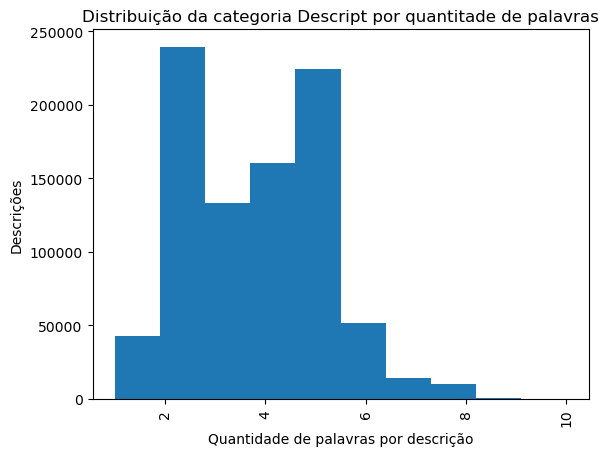

In [35]:
descWords = dadosLimpos['Descript']
descWordCount = dadosLimpos['Descript'].str.split().apply(len)

plt.hist(descWordCount)
plt.xticks(rotation = 90)
plt.title('Distribuição da categoria Descript por quantitade de palavras')
plt.xlabel('Quantidade de palavras por descrição')
plt.ylabel('Descrições')
plt.show()

879

In [40]:
from collections import defaultdict

temp = defaultdict(int)
test_list = dadosLimpos['Descript']
# memoizing count
for sub in test_list:
    for wrd in sub.split():
        temp[wrd] += 1
 
# getting max frequency
res = max(temp, key=temp.get)
 
# printing result
print("Word with maximum frequency : " + str(res))
print("Unique Descript Entries : " + str(descWords.unique().size))

Word with maximum frequency : THEFT
Unique Descript Entries : 879
